# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import pickle

# Set plot style

In [2]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = 12, 8

# Load the Breast Cancer dataset

In [3]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: Malignant, 1: Benign)
feature_names = data.feature_names

# Convert to DataFrame for easier processing

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df['Diagnosis'] = y  # Add target variable

# Display dataset info
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Splitting dataset into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing Features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adding intercept term

In [7]:
rows, cols = X_train.shape
X_train = np.append(np.ones((rows, 1)), X_train, axis=1)  # Include intercept
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)
y_train = y_train.reshape(rows, 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Logistic function

In [8]:
def logistic_function(x):    
    return 1 / (1 + np.exp(-x))

# Compute cost and gradient
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.T, (y_pred - y))
    return cost[0], gradient

# Initialize parameters
theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X_train, y_train)

print("Cost at initialization:", cost)
print("Gradient at initialization:", gradient)

Cost at initialization: 0.6931471805599468
Gradient at initialization: [[-0.12637363]
 [ 0.35422534]
 [ 0.19804598]
 [ 0.36046977]
 [ 0.34512295]
 [ 0.18973301]
 [ 0.29544646]
 [ 0.33479133]
 [ 0.3772926 ]
 [ 0.17336746]
 [ 0.00049705]
 [ 0.27336365]
 [-0.01157031]
 [ 0.26699279]
 [ 0.27439091]
 [-0.03410885]
 [ 0.14089155]
 [ 0.12228892]
 [ 0.20248539]
 [ 0.0061754 ]
 [ 0.02864654]
 [ 0.37559125]
 [ 0.21806508]
 [ 0.37897101]
 [ 0.35700258]
 [ 0.2076456 ]
 [ 0.29138748]
 [ 0.32333383]
 [ 0.38613032]
 [ 0.20822368]
 [ 0.15834057]]


# Gradient Descent

In [9]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

# Run Gradient Descent
theta, costs = gradient_descent(X_train, y_train, theta_init, 0.1, 500)
print("Theta after running gradient descent:", theta)
print("Final cost:", costs[-1])

Theta after running gradient descent: [[ 0.40896809]
 [-0.56036021]
 [-0.63639004]
 [-0.54318109]
 [-0.56164476]
 [-0.26581054]
 [-0.01829283]
 [-0.40183483]
 [-0.56675809]
 [-0.20631461]
 [ 0.31174808]
 [-0.61827013]
 [ 0.03046004]
 [-0.46280103]
 [-0.55893885]
 [-0.06760844]
 [ 0.34649323]
 [ 0.1580804 ]
 [-0.16692323]
 [ 0.18278381]
 [ 0.3765279 ]
 [-0.72309465]
 [-0.79170052]
 [-0.66915833]
 [-0.69066434]
 [-0.57223125]
 [-0.20362609]
 [-0.46366199]
 [-0.68217249]
 [-0.54816745]
 [-0.12109063]]
Final cost: 0.06447860480374219


# Plot Cost Function Convergence

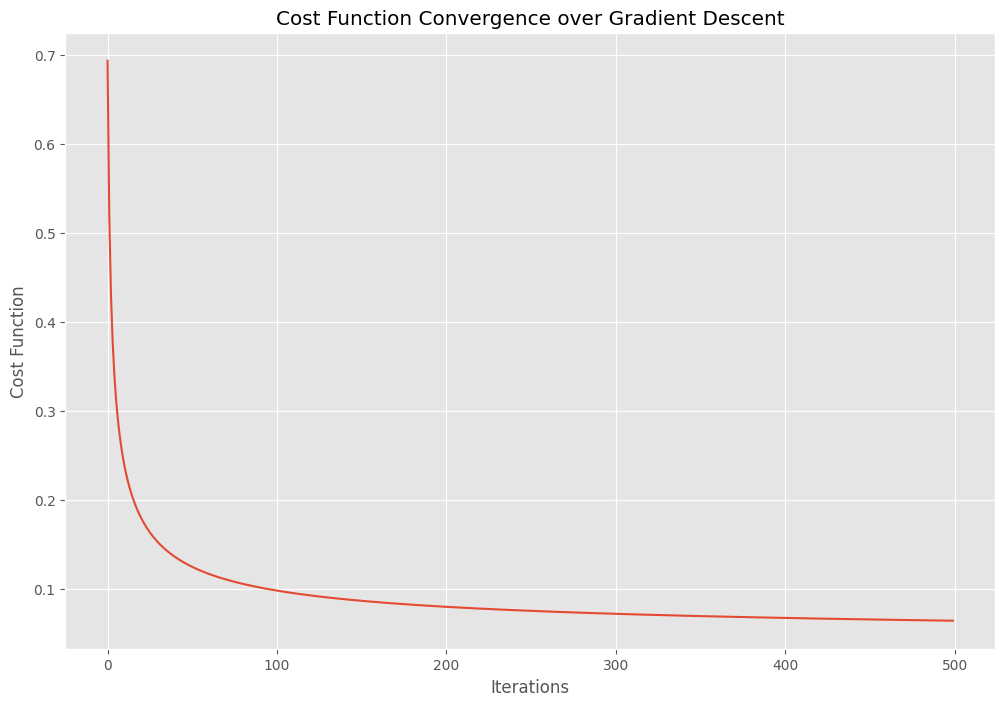

In [10]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function Convergence over Gradient Descent")
plt.show()

# Predictions

In [11]:
def predict(theta, x):
    return logistic_function(x.dot(theta)) >= 0.5

p_train = predict(theta, X_train)
p_test = predict(theta, X_test)

train_accuracy = np.mean(p_train == y_train) * 100
test_accuracy = np.mean(p_test == y_test) * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 98.90%
Test Accuracy: 97.37%


# Example Prediction

In [12]:
test_sample = X_test[0]  # Use first test sample for prediction
probability = logistic_function(test_sample.dot(theta))
print("Probability of First Test Sample Being Benign:", np.round(probability[0], 2))

Probability of First Test Sample Being Benign: 0.0


# Visualization: Feature Importance using Absolute Theta Values

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7668\3041320685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')


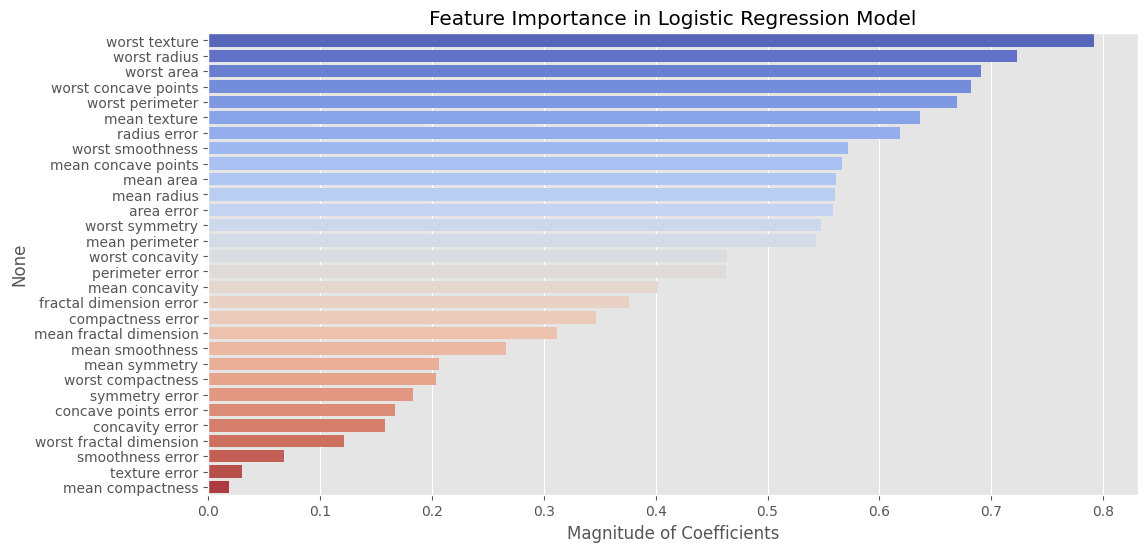

In [13]:
theta_abs = np.abs(theta[1:].flatten())
feature_importance = pd.Series(theta_abs, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')
plt.title("Feature Importance in Logistic Regression Model")
plt.xlabel("Magnitude of Coefficients")
plt.show()

# Confusion Matrix Visualization

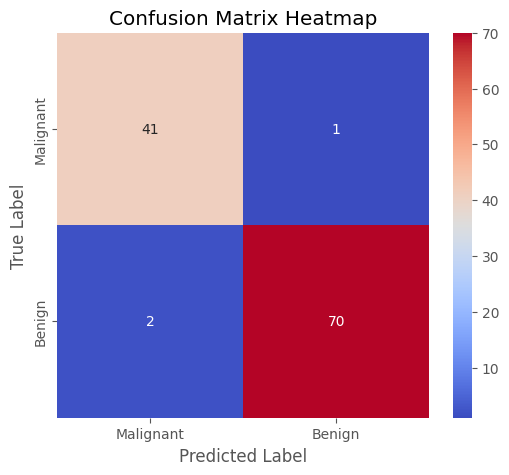

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [15]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump({'theta': theta, 'scaler': scaler}, f)